In [1]:
##################################################################################
############################### LOADING DATA #####################################
##################################################################################

In [2]:
import pandas as pd
import numpy as np
import data_handler as dh

%matplotlib inline

In [3]:
train,test = dh.load_titanic("~/data/kaggle/titanic/")
x_train, y_train, x_test,  y_test = dh.clean_titanic(train,test)

In [4]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(891, 11) (891, 1) (891, 11) (891, 1)


In [5]:
x_train.head()

,Age,Fare,Parch,SibSp,C,Q,S,female,1,2,3
0,22.0,7.2500,0,1,0,0,1,0,0,0,1
1,38.0,71.2833,0,1,1,0,0,1,1,0,0
2,26.0,7.9250,0,0,0,0,1,1,0,0,1
3,35.0,53.1000,0,1,0,0,1,1,1,0,0
4,35.0,8.0500,0,0,0,0,1,0,0,0,1


In [6]:
y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [7]:
##################################################################################
############################ linear regression ###################################
##################################################################################

In [29]:
from sklearn import linear_model

In [30]:
model_linear = linear_model.LinearRegression()
model_linear.fit(x_train,y_train)
model_linear.score(x_test,y_test)

0.39879968321106474

In [31]:
print model_linear.coef_, "\n", model_linear.intercept_

[[ -5.83783380e-03   3.46976132e-04  -1.64107010e-02  -4.09558238e-02
   -1.00933435e-01  -1.02291460e-01  -1.70217303e-01   5.02133555e-01
    1.59510641e-01   1.56094264e-02  -1.75120067e-01]] 
[ 0.6024894]


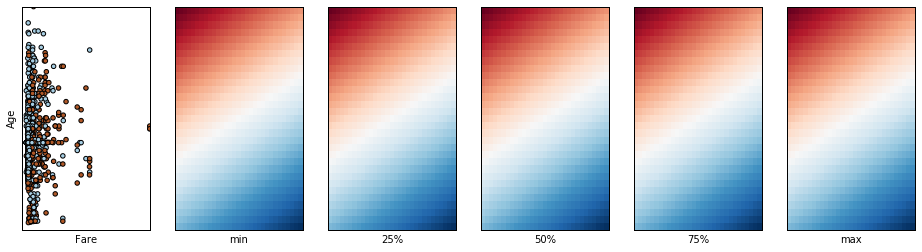

In [32]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_linear.predict(x))

In [13]:
##################################################################################
############################ logistic regression #################################
##################################################################################

In [33]:
model_logistic = linear_model.LogisticRegression()
model_logistic.fit(x_train,y_train)
model_logistic.score(x_test,y_test)

0.8058361391694725

In [34]:
print model_logistic.coef_, "\n", model_logistic.intercept_

[[-0.03759169  0.00270537 -0.08825393 -0.31190353  0.1294778   0.09588826
  -0.31131615  2.60285953  1.01098003  0.15736128 -1.02128381]] 
[ 0.1470575]


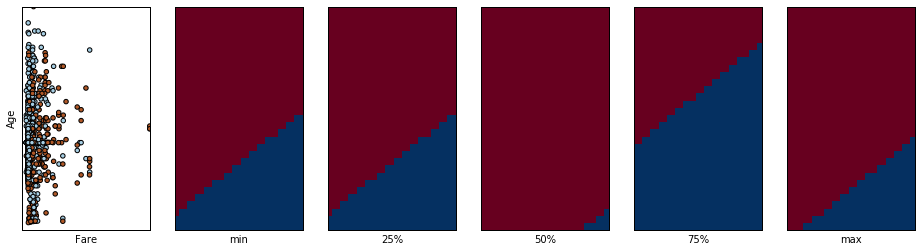

In [35]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_logistic.predict(x))

In [19]:
##################################################################################
################################ decsion tree ####################################
##################################################################################

In [20]:
from sklearn import tree

In [36]:
model_dtree = tree.DecisionTreeClassifier(criterion="gini")
model_dtree.fit(x_train,y_train)
model_dtree.score(x_test,y_test)

0.98204264870931535

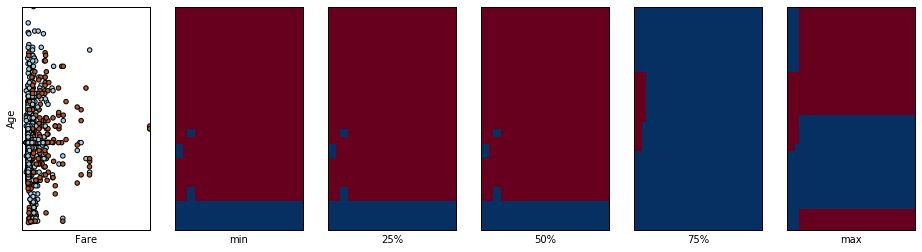

In [37]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_dtree.predict(x))

In [ ]:
##################################################################################
################################ Random forest ###################################
##################################################################################

In [58]:
from sklearn import ensemble

In [59]:
model_rforest = ensemble.RandomForestClassifier()
model_rforest.fit(x_train,y_train)
model_rforest.score(x_test,y_test)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.96857463524130194

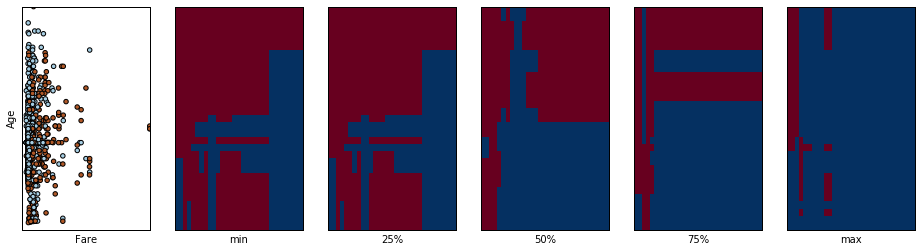

In [60]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_rforest.predict(x))

In [61]:
##################################################################################
######################### Graident Boosted Classifier ############################
##################################################################################

In [65]:
model_gbc = ensemble.GradientBoostingClassifier(n_estimators=100,
                                                learning_rate=0.1,
                                                max_depth=3,
                                                random_state=0)
model_gbc.fit(x_train,y_train)
model_gbc.score(x_test,y_test)

0.90235690235690236

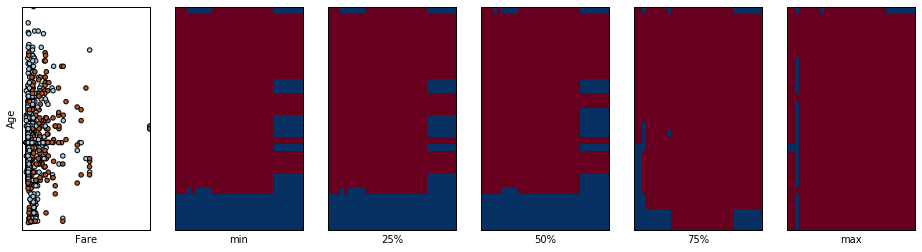

In [66]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_gbc.predict(x))

In [ ]:
##################################################################################
############################# K nearest neighbors ################################
##################################################################################

In [43]:
from sklearn import neighbors

In [46]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors=6)
model_knn.fit(x_train,y_train)
model_knn.score(x_test,y_test)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.78451178451178449

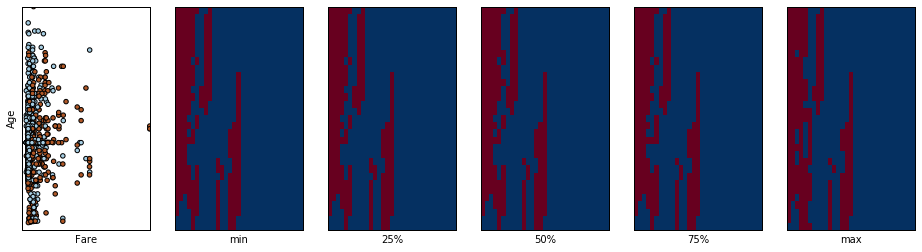

In [47]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_knn.predict(x))

In [ ]:
##################################################################################
################################### k Means ######################################
##################################################################################

In [48]:
from sklearn import cluster

In [56]:
model_kmeans = cluster.KMeans(n_clusters=2)
model_kmeans.fit(x_train,y_train)
model_kmeans.score(x_test,y_test)

-999858.45176962833

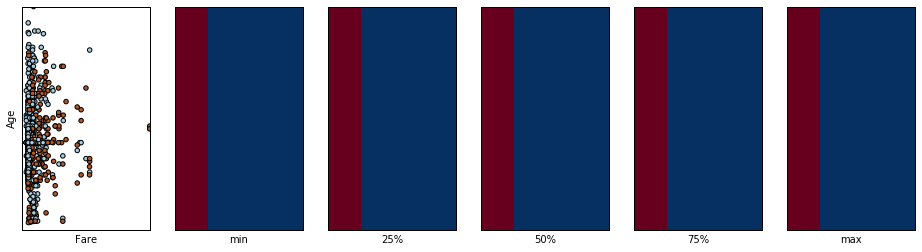

In [57]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_kmeans.predict(x))

In [23]:
##################################################################################
##################################### SVM ########################################
##################################################################################

In [24]:
from sklearn import svm

In [27]:
model_svm = svm.SVC()
model_svm.fit(x_train,y_train)
model_svm.score(x_test,y_test)

0.86644219977553316

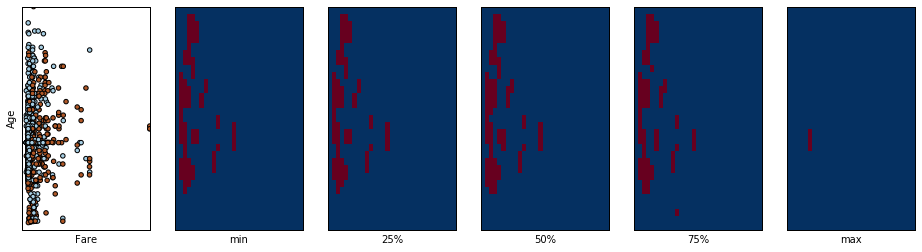

In [28]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_svm.predict(x))

In [38]:
##################################################################################
################################# Naive Bayes ####################################
##################################################################################

In [39]:
from sklearn import naive_bayes

In [40]:
model_bayes = naive_bayes.GaussianNB()
model_bayes.fit(x_train,y_train)
model_bayes.score(x_test,y_test)

0.78900112233445563

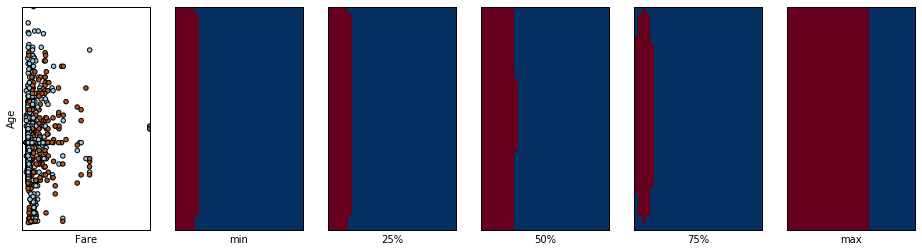

In [41]:
dh.plotboundary(x_train, y_train["Survived"], "Fare", "Age", 
                 lambda x: model_bayes.predict(x))